In [1]:
import numpy as np
import pandas as pd
from sklearn import preprocessing, metrics, model_selection
from matplotlib import pylab as plt
from IPython import display

from ClassRNMulticlase import RNMulticlase

In [2]:
datos = pd.read_csv('../Datos/iris.csv')

X = np.array(datos.iloc[:, :4])
T = np.array(datos['class'])
nomClases = datos['class'].value_counts()
# creating instance of one-hot-encoder
enc = preprocessing.OneHotEncoder(handle_unknown='ignore')
T = enc.fit_transform(T.reshape(-1,1)).toarray()

In [3]:
#--- CONJUNTOS DE ENTRENAMIENTO Y TESTEO ---
X_train, X_test, T_train, T_test = model_selection.train_test_split( \
                                         X, T, test_size=0.20) #, random_state=42)

normalizarEntradas = True
if normalizarEntradas:
    normalizador = preprocessing.StandardScaler()
    X_train = normalizador.fit_transform(X_train)
    X_test = normalizador.transform(X_test)

In [12]:
rn = RNMulticlase(alpha=0.01, n_iter=400, cotaE=10e-09, FUN='logsig', COSTO='EC')
resul=rn.fit(X,T)
print("accuracy = ", rn.accuracy(X,T))
print("Iteraciones = ", len(rn.errors_))

accuracy =  0.6666666666666666
Iteraciones =  400


In [5]:
"""
MAX_ITE = 400
alfa = 0.05
ite=0
CotaError = 10e-9
AVGError = 1
AVGErrorAnt=0
itera=[]

EPS = np.finfo(float).eps

while ((ite<MAX_ITE) and (abs(AVGErrorAnt-AVGError)>CotaError)):
    AVGErrorAnt = AVGError
    suma= 0.0
    for e in range(nCantEjemplos):
        # --- Calcular la respuesta de la capa SOFTMAX ---
        netas = W @ X[e:e+1,:].T + b
        y = np.exp(netas)/np.sum(np.exp(netas))
                
        deltaO = T[e:e+1, :].T-y
        # for s in range(nOut):
        #     W[s,:] = W[s,:] + alfa * deltaO[s] * X[e,:]
        #     b[s] = b[s] + alfa * deltaO[s]
        
        W = W + alfa * deltaO @ X[e:e+1,:]
        b = b + alfa * deltaO
        
        #-- acumular el error para promediar al final
        suma = suma + np.sum(-T[e:e+1, :].T*np.log(y+EPS))

    # --- aprox. del error cuadrático promedio --- 
    AVGError = np.sum(suma/nCantEjemplos)
    
    # --- calcular la tasa de aciertos para graficar después---
    salidas = W @ X.T + b
    y = np.exp(salidas)/np.sum(np.exp(salidas), axis=0)
    y_pred = (y.T>0.5)*1
    cantErrores = np.sum((np.sum(T!=y_pred,axis=1)>0)*1)
    TasaAciertos = 1-cantErrores/nCantEjemplos
    
    itera.append([AVGError, TasaAciertos])
    
    ite = ite + 1
print("% aciertos = ", TasaAciertos)    
"""
print("")

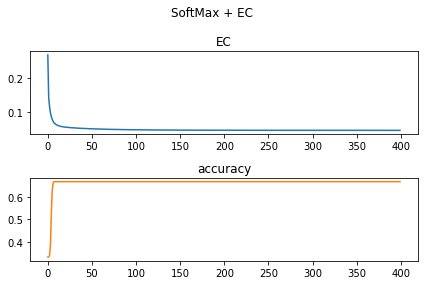

In [13]:
x = range(len(rn.errors_))    
fig, (ax1, ax2)= plt.subplots(2)
ax1.plot(x, rn.errors_)
ax1.set_title('EC')
ax2.plot(x, rn.accuracy_, 'tab:orange')
ax2.set_title('accuracy')
plt.suptitle('SoftMax + EC')
fig.tight_layout()